# Body fat model
Guillaume Thibault 


The measurement of the BodyFat index is complicated, time consuming and expensive: the person must be immersed in water. Can we develop a reliable model that would allow us to predict Y_BodyFat more simply and quickly with the variables that are easy to measure

In [ ]:
using Pkg
Pkg.add("DataFrames")
Pkg.add("CSV")
Pkg.add("GLM")
Pkg.add("Statistics")
Pkg.add("StatsBase")
Pkg.add("StatsPlots")

In [2]:
using CSV, DataFrames, GLM, Statistics, Distributions, Gadfly, LinearAlgebra

In [3]:
data = CSV.read("data.csv", DataFrame);
first(data,5)

,ID,genre,X1_epTricep,X2_circHanches,X3_circBras,Y_BodyFat
,Int64,String7,Float64,Float64,Float64,Float64
1,1,femme,19.5,43.1,29.1,11.9
2,2,femme,24.7,49.8,28.2,22.8
3,3,femme,30.7,51.9,37.0,18.7
4,4,femme,29.8,54.3,31.1,20.1
5,5,femme,19.1,42.2,30.9,12.9


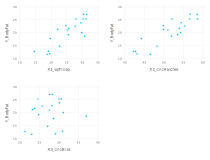

In [4]:
set_default_plot_size(21cm, 16cm)
fig1 = plot(data, x=:X1_epTricep, y=:Y_BodyFat, Geom.point, Coord.cartesian(ymin=10, ymax=30))
fig2 = plot(data, x=:X2_circHanches, y=:Y_BodyFat, Geom.point, Coord.cartesian(ymin=10, ymax=30))
fig3 = plot(data, x=:X3_circBras, y=:Y_BodyFat, Geom.point, Coord.cartesian(ymin=10, ymax=30))
gridstack([fig1 fig2 ; fig3 plot()])

### 6a) Calculate the correlation matrix.
Produce an overall scattergram between all variables.
Is the positive correlation between the variables valid?

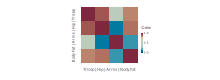

In [49]:
correlation_matrix = cor(Matrix(data[:, [:X1_epTricep, :X2_circHanches, :X3_circBras, :Y_BodyFat]]))

spy(correlation_matrix,
    Guide.xlabel("Tricep | Hip | Arms | Body Fat"), 
    Guide.ylabel("Body Fat | Arms | Hip | Tricep"), 
    Guide.xticks(label=false),
    Guide.yticks(label=false)
)

The observed correlations are all positive. This result can be interpreted by the fact that the increase of the fat index will increase the fat deposits on the body. Moreover, we observe that the measurement on the arm does not help much in the prediction

### 6b) Develop the Ordinary Multiple Regression Model (OMRM) between Y and X1, X2, X3.
Examine the sign of the coefficients in the MRO model.
* Does the model appear to be satisfactory?
* What is the cause?
* What can be done to obtain a more satisfactory model?

> Let's start by looking at simple models for the three variables.

In [41]:
# Data in vectors
x₁ = convert(Array{Float64},data[!,:X1_epTricep])
x₂ = convert(Array{Float64}, data[!, :X2_circHanches])
x₃ = convert(Array{Float64}, data[!, :X3_circBras])
y = convert(Array{Float64},data[!,:Y_BodyFat])

# Useful statistics
n = length(y)
x̄₁ = mean(x₁)
x̄₂ = mean(x₂)
x̄₃ = mean(x₃)
ȳ = mean(y)

# Regression coefficients (slope and intercept)
β̂₁₁ = sum( (x₁[i] - x̄₁)*(y[i] - ȳ) for i=1:n) / sum( (x₁[i] - x̄₁)^2 for i=1:n )
β̂₀₁ = ȳ - β̂₁₁*x̄₁

β̂₁₂ = sum( (x₂[i] - x̄₂)*(y[i] - ȳ) for i=1:n) / sum( (x₂[i] - x̄₂)^2 for i=1:n )
β̂₀₂ = ȳ - β̂₁₂*x̄₂

β̂₁₃ = sum( (x₃[i] - x̄₃)*(y[i] - ȳ) for i=1:n) / sum( (x₃[i] - x̄₃)^2 for i=1:n )
β̂₀₃ = ȳ - β̂₁₃*x̄₃

# Display of the regression coefficients
println("β̂₀₁ = $β̂₀₁")
println("β̂₁₁ = $β̂₁₁")

println("\nβ̂₀₂ = $β̂₀₂")
println("β̂₁₂ = $β̂₁₂")

println("\nβ̂₀₃ = $β̂₀₃")
println("β̂₁₃ = $β̂₁₃")


β̂₀₁ = -1.4961046410368972
β̂₁₁ = 0.8571865102168306

β̂₀₂ = -23.634489130309518
β̂₁₂ = 0.85654659234531

β̂₀₃ = 14.686780858775304
β̂₁₃ = 0.1994286437807638


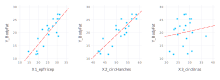

In [45]:
set_default_plot_size(22cm, 8cm)
plot(data, x=:X1_epTricep, y=:Y_BodyFat, Geom.point, Coord.cartesian(ymin=10, ymax=30),
    intercept = [β̂₀], slope = [β̂₁], Geom.abline(color="red", style=:dash))


fig1a = plot(data, x=:X1_epTricep, y=:Y_BodyFat, Geom.point, Coord.cartesian(ymin=10, ymax=30),
            intercept = [β̂₀₁], slope = [β̂₁₁], Geom.abline(color="red", style=:dash)
        )
fig1b = plot(data, x=:X2_circHanches, y=:Y_BodyFat, Geom.point, Coord.cartesian(ymin=10, ymax=30),
        intercept = [β̂₀₂], slope = [β̂₁₂], Geom.abline(color="red", style=:dash)
    )
fig1c = plot(data, x=:X3_circBras, y=:Y_BodyFat, Geom.point, Coord.cartesian(ymin=10, ymax=30),
    intercept = [β̂₀₃], slope = [β̂₁₃], Geom.abline(color="red", style=:dash)
)

hstack(fig1a,fig1b,fig1c)

In [50]:
# Tricep
e = y .- β̂₀₁ .- β̂₁₁*x₁
SSE = e'e
R²₁ = 1 - SSE/SST

# Hip
e = y .- β̂₀₂ .- β̂₁₂*x₂
SSE = e'e
R²₂ = 1 - SSE/SST

# Arm
e = y .- β̂₀₃ .- β̂₁₃*x₃
SSE = e'e
R²₃ = 1 - SSE/SST

println("R² for Tricep = ",R²₁)
println("R² for Hip = ",R²₂)
println("R² for Arm = ",R²₃)


R² for Tricep = 0.7110966155559691
R² for Hip = 0.7710414083275696
R² for Arm = 0.020290301881323747


> Now, incorporating the three variables

In [36]:
# Data in vectors
x₁ = convert(Array{Float64},data[!,:X1_epTricep])
x₂ = convert(Array{Float64},data[!,:X2_circHanches])
x₃ = convert(Array{Float64},data[!,:X3_circBras])
y = convert(Array{Float64},data[!,:Y_BodyFat])

# Size of the sample
n = length(y)

# Convert to matrix
X = hcat(ones(n), x₁, x₂, x₃)

# Find coefficients
β̂ = (X'X)\X'y

# Display coefficients
println("β̂ = ", β̂)

β̂ = 

[117.0846947802495, 4.334092008375274, -2.856847936298782, -2.186060251693594]


In [38]:
e = y - X*β̂

SSE = e'e

SST = sum( (y[i] - ȳ)^2 for i=1:n )  # total variability
SSE = sum( e.^2 )

R² = 1 - SSE/SST

println("R² = ", R²)

R² = 0.8013585508623703


### Propose 2 other models, Mod1, Mod2 incorporating all the variables X. to obtain a more satisfactory model.